# pywt

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pywt
import pywt.data


In [60]:
pywt.dwt2?

Signature: pywt.dwt2(data, wavelet, mode='symmetric', axes=(-2, -1))
Docstring:
2D Discrete Wavelet Transform.

Parameters
----------
data : array_like
    2D array with input data
wavelet : Wavelet object or name string, or 2-tuple of wavelets
    Wavelet to use.  This can also be a tuple containing a wavelet to
    apply along each axis in ``axes``.
mode : str or 2-tuple of strings, optional
    Signal extension mode, see :ref:`Modes <ref-modes>`. This can
    also be a tuple of modes specifying the mode to use on each axis in
    ``axes``.
axes : 2-tuple of ints, optional
    Axes over which to compute the DWT. Repeated elements mean the DWT will
    be performed multiple times along these axes.

Returns
-------
(cA, (cH, cV, cD)) : tuple
    Approximation, horizontal detail, vertical detail and diagonal
    detail coefficients respectively.  Horizontal refers to array axis 0
    (or ``axes[0]`` for user-specified ``axes``).

Examples
--------
>>> import numpy as np
>>> import pywt


In [61]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

In [62]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

- cA -> LL
- cH -> LH
- cV -> HL
- cD -> HH

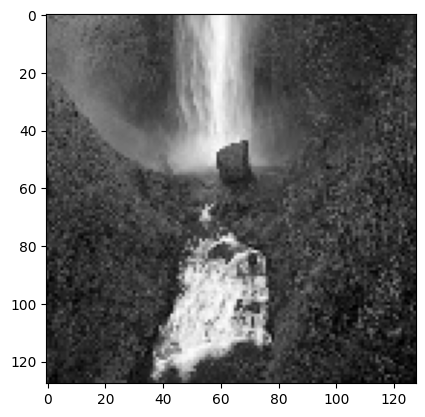

In [6]:
# Load image
original = cv2.imread(r".\extracted_frames\frame_0023.png")
plt.imshow(original, cmap=plt.cm.gray)

In [7]:
original.shape

(128, 128, 3)

In [8]:
b,g,r = cv2.split(original)

coeffsb = pywt.dwt2(b, 'haar')
LLb, (LHb, HLb, HHb) = coeffsb

coeffsg = pywt.dwt2(g, 'haar')
LLg, (LHg, HLg, HHg) = coeffsg

coeffsr = pywt.dwt2(b, 'haar')
LLr, (LHr, HLr, HHb) = coeffsr



In [10]:
LL = cv2.merge((coeffsb[0], coeffsg[0], coeffsr[0]))
LH = cv2.merge((coeffsb[1][0], coeffsg[1][0], coeffsr[1][0]))
HL = cv2.merge((coeffsb[1][1], coeffsg[1][1], coeffsr[1][1]))
HH = cv2.merge((coeffsb[1][2], coeffsg[1][2], coeffsr[1][2]))

In [13]:
LL.shape, LH.shape, HL.shape, HH.shape

((64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3))

In [14]:
def dwt_transform(image, wavelet = 'haar'):
    
    b, g, r = cv2.split(image)

    coeffsb = pywt.dwt2(b, wavelet)
    coeffsg = pywt.dwt2(g, wavelet)
    coeffsr = pywt.dwt2(r, wavelet)
    
    LL = cv2.merge((coeffsb[0], coeffsg[0], coeffsr[0]))
    LH = cv2.merge((coeffsb[1][0], coeffsg[1][0], coeffsr[1][0]))
    HL = cv2.merge((coeffsb[1][1], coeffsg[1][1], coeffsr[1][1]))
    HH = cv2.merge((coeffsb[1][2], coeffsg[1][2], coeffsr[1][2]))
    
    return (LL, (LH, HL, HH))

In [22]:
coeffs = LL, (LH, HL, HH) = dwt_transform(original)

In [27]:
coeffs[0].shape, coeffs[1][0].shape

((64, 64, 3), (64, 64, 3))

In [16]:
LL.shape, LH.shape, HL.shape, HH.shape

((64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3))

In [21]:
LL[:, :, 0].shape

(64, 64)

In [30]:
wavelet = 'haar'

In [34]:
coeffsB = (coeffs[0][:, :, 0], 
            (coeffs[1][0][:, :, 0],
            coeffs[1][1][:, :, 0],
            coeffs[1][1][:, :, 0]))
coeffsG = (coeffs[0][:, : , 1],
            (coeffs[1][0][:, :, 1],
            coeffs[1][1][:, :, 1],
            coeffs[1][1][:, :, 1]))
coeffsR = (coeffs[0][:, : , 2],
            (coeffs[1][0][:, :, 2],
            coeffs[1][1][:, :, 2],
            coeffs[1][1][:, :, 2]))
Ib = pywt.idwt2(coeffsB, wavelet=wavelet)
Ig = pywt.idwt2(coeffsG, wavelet=wavelet)
Ir = pywt.idwt2(coeffsR, wavelet=wavelet)

I = cv2.merge((Ib, Ig, Ir))

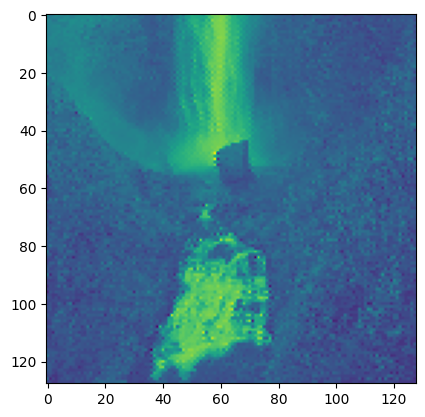

In [36]:
plt.imshow(Ib)

In [28]:
def inverse_dwt(coeffs , wavelet = 'haar'):

    coeffsB = (coeffs[0][:, :, 0], 
               (coeffs[1][0][:, :, 0],
               coeffs[1][1][:, :, 0],
               coeffs[1][1][:, :, 0]))
    coeffsG = (coeffs[0][:, : , 1],
               (coeffs[1][0][:, :, 1],
                coeffs[1][1][:, :, 1],
                coeffs[1][1][:, :, 1]))
    coeffsR = (coeffs[0][:, : , 2],
               (coeffs[1][0][:, :, 2],
                coeffs[1][1][:, :, 2],
                coeffs[1][1][:, :, 2]))
    
    Ib = pywt.idwt2(coeffsB, wavelet=wavelet)
    Ig = pywt.idwt2(coeffsG, wavelet=wavelet)
    Ir = pywt.idwt2(coeffsR, wavelet=wavelet)

    return cv2.merge(Ib, Ig, Ir)

In [19]:
reconstructed = pywt.idwt2((LL, (LH, HL, HH)), 'haar')


TypeError: Invalid shape (64, 128, 6) for image data

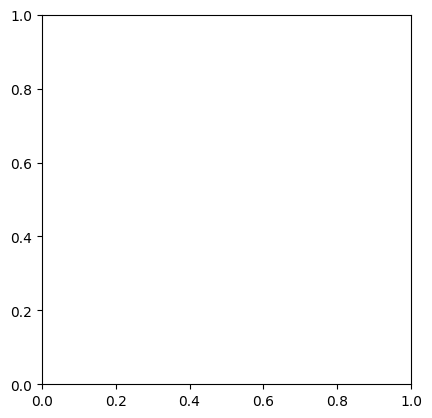

In [20]:
plt.imshow(reconstructed, cmap=plt.cm.gray)

In [83]:
LLb.shape

(64, 64)

In [85]:
LL = cv2.merge((LLb, LLg, LLr))


In [86]:
LL.shape

(64, 64, 3)

In [67]:

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(original, 'haar')

LL, (LH, HL, HH) = coeffs2


In [68]:
original.shape

(128, 128, 3)

- Boric 1.3 
    - n / 2 + 2

- Haar
    - n / 2
  
- db
  - db1
    - n / 2
  - db2
    - n / 2 + 1
  

In [69]:
LL.shape

(128, 64, 2)

In [70]:
LH.shape

(128, 64, 2)

In [71]:
HL.shape

(128, 64, 2)

In [72]:
HH.shape

(128, 64, 2)

TypeError: Invalid shape (128, 64, 2) for image data

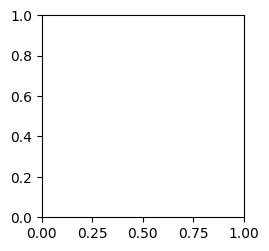

In [73]:

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

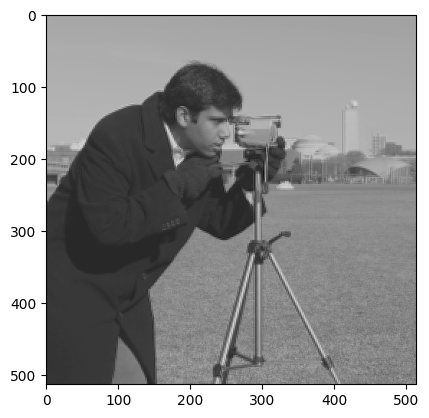

In [49]:
reconstructed = pywt.idwt2(coeffs2, 'haar')
plt.imshow(reconstructed, cmap=plt.cm.gray)

## inverse dwt

In [ ]:
import cv2
import pywt
import numpy as np

def dwt_transform(image, wavelet='haar', inverse=False):
    if not inverse:
        b, g, r = cv2.split(image)

        coeffsb = pywt.dwt2(b, wavelet)
        coeffsg = pywt.dwt2(g, wavelet)
        coeffsr = pywt.dwt2(r, wavelet)
        
        # only returning LL band with 3 channels
        return cv2.merge((coeffsb[0], coeffsg[0], coeffsr[0]))

    if inverse:
        # Assuming input is a 3-channel image with only LL bands
        LLb, LLg, LLr = cv2.split(image)
        
        # Create dummy coefficients with LL bands and zero out others (LH, HL, HH)
        coeffsb = (LLb, (np.zeros_like(LLb), np.zeros_like(LLb), np.zeros_like(LLb)))
        coeffsg = (LLg, (np.zeros_like(LLg), np.zeros_like(LLg), np.zeros_like(LLg)))
        coeffsr = (LLr, (np.zeros_like(LLr), np.zeros_like(LLr), np.zeros_like(LLr)))
        
        # Perform the inverse DWT
        b = pywt.idwt2(coeffsb, wavelet)
        g = pywt.idwt2(coeffsg, wavelet)
        r = pywt.idwt2(coeffsr, wavelet)
        
        # Merge the channels back to form the image
        return cv2.merge((b, g, r))


# frame extraction and saving

In [53]:
import cv2
import os

# Function to extract frames from video
def extract_frames(video_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    video_capture = cv2.VideoCapture(video_path)
    if not video_capture.isOpened():
        print(f"Error: Could not open video {video_path}")
        return
    frame_count = 0
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.png")
        cv2.imwrite(frame_filename, frame)
        print(f"Extracted frame {frame_count}")
        frame_count += 1
    video_capture.release()
    print("Frame extraction completed.")

extract_frames('testVid.mp4', 'extracted_frames')


Extracted frame 0
Extracted frame 1
Extracted frame 2
Extracted frame 3
Extracted frame 4
Extracted frame 5
Extracted frame 6
Extracted frame 7
Extracted frame 8
Extracted frame 9
Extracted frame 10
Extracted frame 11
Extracted frame 12
Extracted frame 13
Extracted frame 14
Extracted frame 15
Extracted frame 16
Extracted frame 17
Extracted frame 18
Extracted frame 19
Extracted frame 20
Extracted frame 21
Extracted frame 22
Extracted frame 23
Extracted frame 24
Extracted frame 25
Extracted frame 26
Extracted frame 27
Extracted frame 28
Extracted frame 29
Extracted frame 30
Extracted frame 31
Extracted frame 32
Extracted frame 33
Extracted frame 34
Extracted frame 35
Extracted frame 36
Extracted frame 37
Extracted frame 38
Extracted frame 39
Extracted frame 40
Extracted frame 41
Extracted frame 42
Extracted frame 43
Extracted frame 44
Extracted frame 45
Extracted frame 46
Extracted frame 47
Extracted frame 48
Extracted frame 49
Extracted frame 50
Extracted frame 51
Extracted frame 52
Ext

In [87]:
def create_video_from_images(image_folder, output_video_path, frame_rate=20):
    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    images.sort()  
    
    if not images:
        print("No images found in the folder.")
        return
    
    first_image_path = os.path.join(image_folder, images[0])
    frame = cv2.imread(first_image_path)
    height, width, channels = frame.shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
    video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))
    
    for image in images:
        image_path = os.path.join(image_folder, image)
        frame = cv2.imread(image_path)
        
        if frame is None:
            print(f"Error reading image {image_path}")
            continue
        
        video_writer.write(frame)
        print(f"Writing frame {image_path}")
    
    video_writer.release()
    print(f"Video creation completed. Saved to {output_video_path}")

image_folder = 'extracted_frames'

output_video_path = 'output_video.mp4'

create_video_from_images(image_folder, output_video_path)


Writing frame extracted_frames\frame_0000.png
Writing frame extracted_frames\frame_0001.png
Writing frame extracted_frames\frame_0002.png
Writing frame extracted_frames\frame_0003.png
Writing frame extracted_frames\frame_0004.png
Writing frame extracted_frames\frame_0005.png
Writing frame extracted_frames\frame_0006.png
Writing frame extracted_frames\frame_0007.png
Writing frame extracted_frames\frame_0008.png
Writing frame extracted_frames\frame_0009.png
Writing frame extracted_frames\frame_0010.png
Writing frame extracted_frames\frame_0011.png
Writing frame extracted_frames\frame_0012.png
Writing frame extracted_frames\frame_0013.png
Writing frame extracted_frames\frame_0014.png
Writing frame extracted_frames\frame_0015.png
Writing frame extracted_frames\frame_0016.png
Writing frame extracted_frames\frame_0017.png
Writing frame extracted_frames\frame_0018.png
Writing frame extracted_frames\frame_0019.png
Writing frame extracted_frames\frame_0020.png
Writing frame extracted_frames\fra

# watermark creation

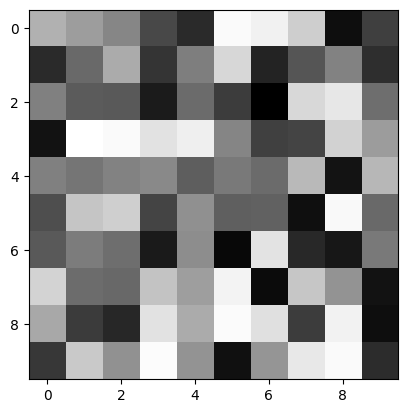

In [100]:
def create_watermark(shape):
    return np.random.randint(0, 256, shape, dtype=np.uint8)

rw, cw = (10, 10)  
W = create_watermark((rw, cw))
plt.imshow(W, cmap=plt.cm.gray)

# Embedding

In [ ]:
def embedEX(I, W, a, b, Z1, Z2, type:bool):

    #split channel
    r, g, b = a[:,:,0], a[:,:,1], a[:,:,2]
    
    #Water mark size
    rw, cw = water.shape
    EW = np.zeroes(shape=(rw,cw))
    
    #LLBand
    rLL,rLH,rHL,rHH = pywt.dwt2(r, 'db1',)
    gLL,gLH,gHL,gHH = pywt.dwt2(g, 'db1',)
    bLL,bLH,bHL,bHH = pywt.dwt2(b, 'db1',)
    
    #get size of LLband
    rc, cc = rLL.shape
    
    #MASK
    mask = np.zeros(rc,cc,3)
    
    #CFOLD
    def CFOLD(Z):
        return Z.real%1 + (Z.imag%1)*1j
    
    #Main loop
    for i in range(1,rw):
        for j in range(1,cw):
            
            while True:
                #Z1, Z2 and CFOLD computation
                z1 = CFOLD(A*((z1/z2)**2)) # + c1 ignored for now
                z2 = CFOLD(B*((z2/z1)**2)) # + c2 ignored 
    
                #X and Y
                x = np.floor(z1.real*(10**14))%rc/4
                y = np.floor(z1.imag*(10**14))%cc/4
    
                #channel
                channel = np.floor(z2.real*(10**14))%3
    
                #bit encryption
                bita = np.floor(z2.imag*(10**14))%2
                if mask[x+1,y+1,channel] == 0:
                    break

        #Block
        if channel == 0:
            block = rLL[x*4+1: x*4+4, y*4+1: y*4+4]
        elif channel == 1:
            block = bLL[x*4+1: x*4+4, y*4+1: y*4+4]
        else:
            block = gLL[x*4+1: x*4+4, y*4+1: y*4+4]

        #SVD
        U, S, V = np.linalg.svd(block)

        #EMBED & EXTRACT
        #embed
        if type == 0:
            
            #Get mean of first two elements of first U vector
            meanV = (np.abs(U[1,1])+np.abs(U[2,1]))/2

            #WaterMarking
            if water[i,j] == 0:
                if np.abs(U[1,1]) > np.abs(U[2,1]) and np.abs(U[2,1]) - np.abs(U[1,1]) < T: # defin T later
                    U[1,1] = np.sign(U[1,1]) * (meanV + T/2)
                    U[2,1] = np.sign(U[2,1]) * (meanV - T/2)

            water[i,j] = water[i,j] ^ bita # ENCRYPTION PROCESS
            
            if water[i,j] == 1:
                if np.abs(U[1,1]) < np.abs(U[2,1]) and np.abs(U[2,1]) - np.abs(U[1,1]) > T: # defin T later
                    U[1,1] = np.sign(U[1,1]) * (meanV - T/2)
                    U[2,1] = np.sign(U[2,1]) * (meanV + T/2)

            #Reconstruction
            rank = S.size
            recon = U[:,:rank]@np.diag(S)@V[:rank,:]
            if channel == 0:
                rLL[x*4+1: x*4+4, y*4+1: y*4+4] = recon
            elif channel == 1:
                gLL[x*4+1: x*4+4, y*4+1: y*4+4] = recon
            else:
                bLL[x*4+1: x*4+4, y*4+1: y*4+4] = recon

        #EXTRACTION
        if type == 1:
            if np.abs(U[1,1]) > np.abs(U[2,1]):
                EW[i,j] = 0
            else:
                EW[i,j] = 1
            EW[i,j] = EW[i,j] ^ bita #DECRYPTION PROCESS
        mask[x+1,y+1,channel] = 1
    
    #Save final Z1, Z2 for initial conditions of next frame
    if type == 0:
        WIr = pywt.idwt2(recon, rLH,rHL,rHH)
        WIg = pywt.idwt2(recon, gLH,gHL,gHH)
        WIb = pywt.idwt2(recon, bLH,bHL,bHH)
        WI = np.array([WIr,WIg,WIb])
        return WI
    else:
        return EW

        

# svd

In [22]:
import numpy as np
X = np.random.normal(size=[20,18])
U, S, V = np.linalg.svd(X, full_matrices=True)


In [23]:
X.shape

(20, 18)

In [24]:
U.shape

(20, 20)

In [25]:
S.shape

(18,)

In [26]:
V.shape

(18, 18)

In [29]:
X_a = U @ (S @ V)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 20)

In [ ]:
print(np.std(X), np.std(X_a), np.std(X - X_a))
print('Is X close to X_a?', np.isclose(X, X_a).all())

In [33]:
U, S, Vt = np.linalg.svd(X)
U.shape, S.shape, Vt.shape




((20, 20), (18,), (18, 18))

In [34]:
sigma = np.diag(S)
sigma.shape

(18, 18)

In [36]:
sigma_full = np.zeros((U.shape[0], Vt.shape[1]))
sigma_full[:sigma.shape[0], :sigma.shape[1]] = sigma
sigma_full.shape

(20, 18)

In [41]:
X_reconstructed = U @ sigma_full @ Vt

In [38]:
X_reconstructed = np.dot(U, np.dot(sigma_full, Vt))
X_reconstructed.shape

(20, 18)

In [43]:
np.allclose(X, X_reconstructed)

True

# miscellaneous

In [51]:
import copy
D = {'Z' : []}
d_copy = copy.deepcopy(D)

In [53]:
def transform(d):
    for i in range(5):
        d['Z'].append(i)
    

In [54]:
transform(d_copy)

In [55]:
D, d_copy

({'Z': []}, {'Z': [0, 1, 2, 3, 4]})